In [1]:


import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('flights.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
%matplotlib inline
import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score


import pandas as pd    
import matplotlib.pyplot as plt

   

import statsmodels.formula.api as sm

import seaborn as sns

import datetime
import time
from time import strftime, gmtime

import statsmodels.formula.api as smf

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample

In [4]:
df_flights=pd.read_csv("flights.csv").sample(n=100000)


C:\Users\91636\AppData\Local\Temp\ipykernel_11504\1452183206.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights=pd.read_csv("flights.csv").sample(n=100000)


In [5]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
894888,2015,2,28,6,DL,1159,N935DL,BUF,ATL,1529,...,1734.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3251638,2015,7,22,3,AA,644,N839AW,PHX,ONT,1655,...,1758.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
208949,2015,1,14,3,EV,5730,N820AS,PVD,IAD,1427,...,1616.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1048268,2015,3,10,2,OO,4770,N439SW,MSP,DIK,958,...,1041.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5319238,2015,11,29,7,WN,206,N777QC,LBB,AUS,1850,...,2014.0,19.0,0,0,NaN,19.0,0.0,0.0,0.0,0.0


In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 894888 to 3648150
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99773 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       98514 non-null   float64
 11  DEPARTURE_DELAY      98514 non-null   float64
 12  TAXI_OUT             98462 non-null   float64
 13  WHEELS_OFF           98462 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME    

In [7]:
df_flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              227
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1486
DEPARTURE_DELAY         1486
TAXI_OUT                1538
WHEELS_OFF              1538
SCHEDULED_TIME             0
ELAPSED_TIME            1800
AIR_TIME                1800
DISTANCE                   0
WHEELS_ON               1590
TAXI_IN                 1590
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1590
ARRIVAL_DELAY           1800
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98452
AIR_SYSTEM_DELAY       81646
SECURITY_DELAY         81646
AIRLINE_DELAY          81646
LATE_AIRCRAFT_DELAY    81646
WEATHER_DELAY          81646
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

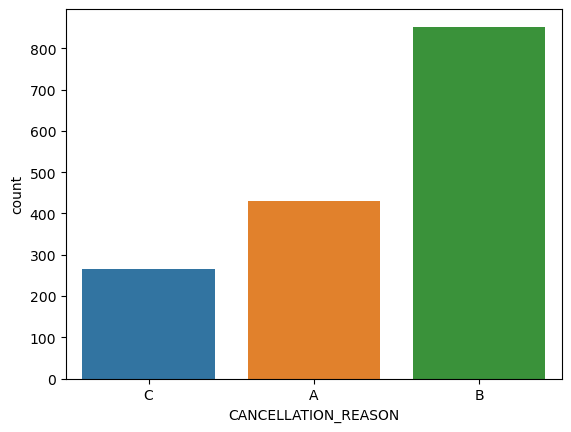

In [8]:
sns.countplot(x='CANCELLATION_REASON',data=df_flights)

<Axes: xlabel='MONTH', ylabel='count'>

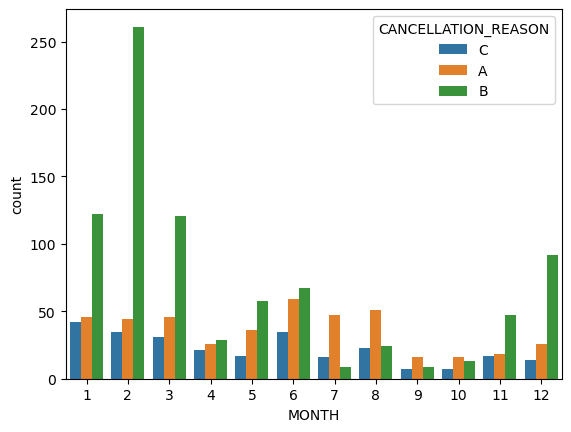

In [9]:

sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=df_flights)

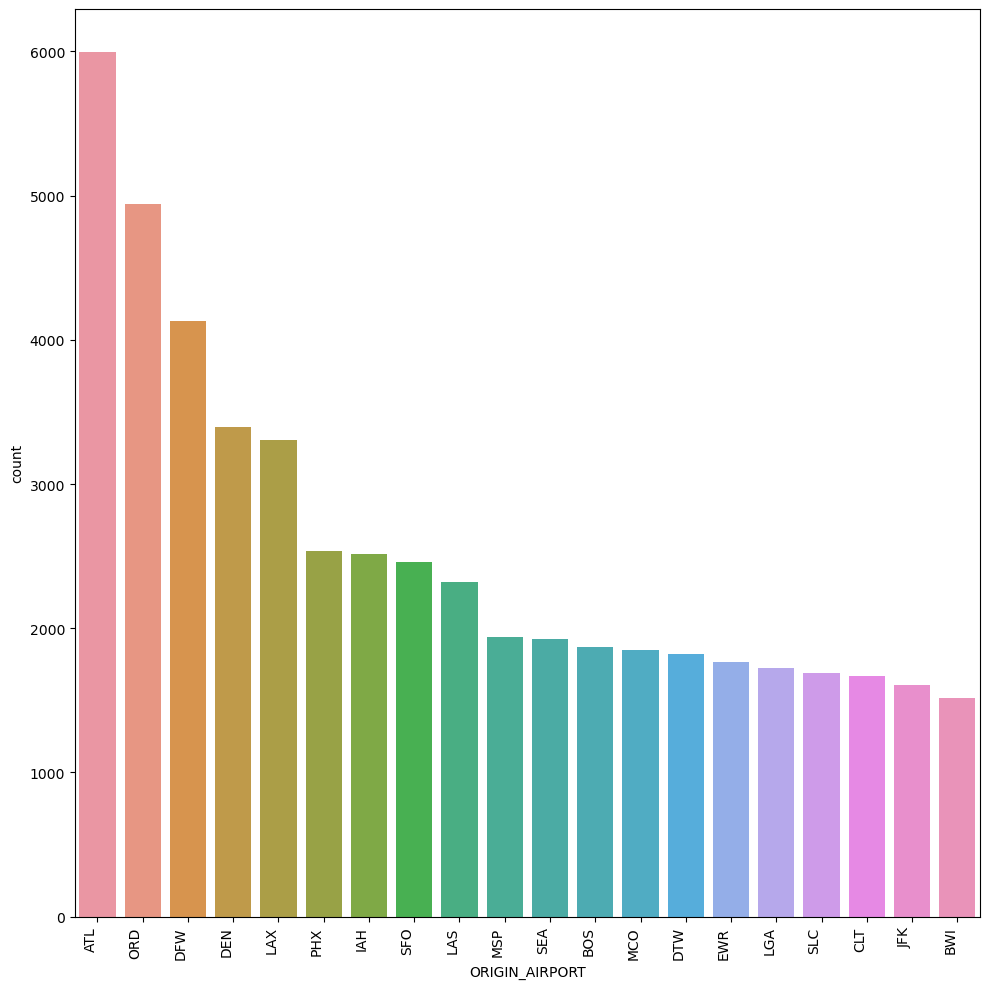

In [10]:

plt.figure(figsize=(10, 10))
axis = sns.countplot(x=df_flights['ORIGIN_AIRPORT'], data =df_flights, order=df_flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

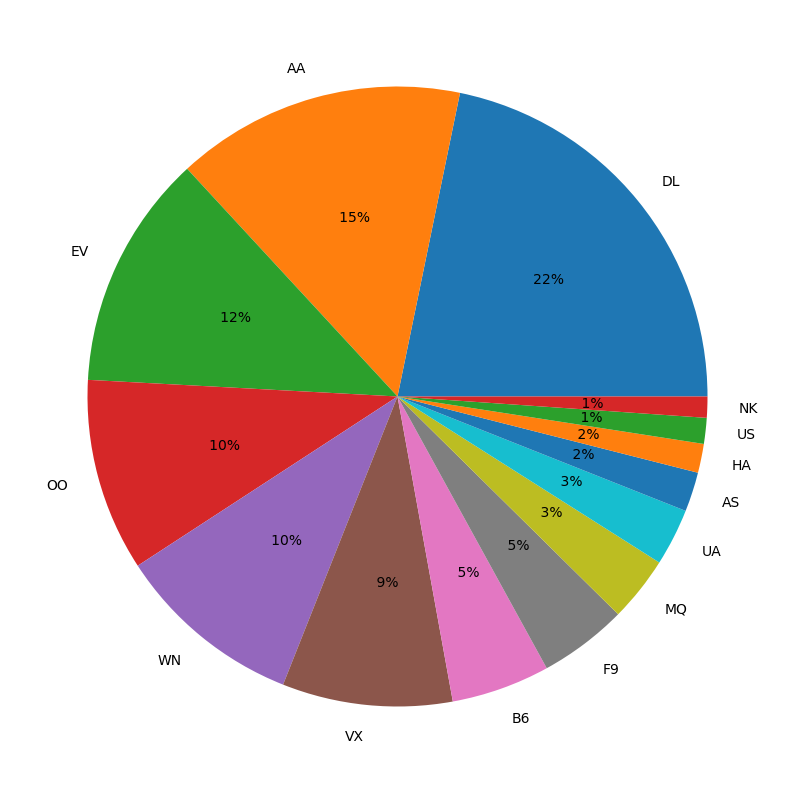

In [11]:
axis = plt.subplots(figsize=(10,14))
Name = df_flights["AIRLINE"].unique()
size = df_flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

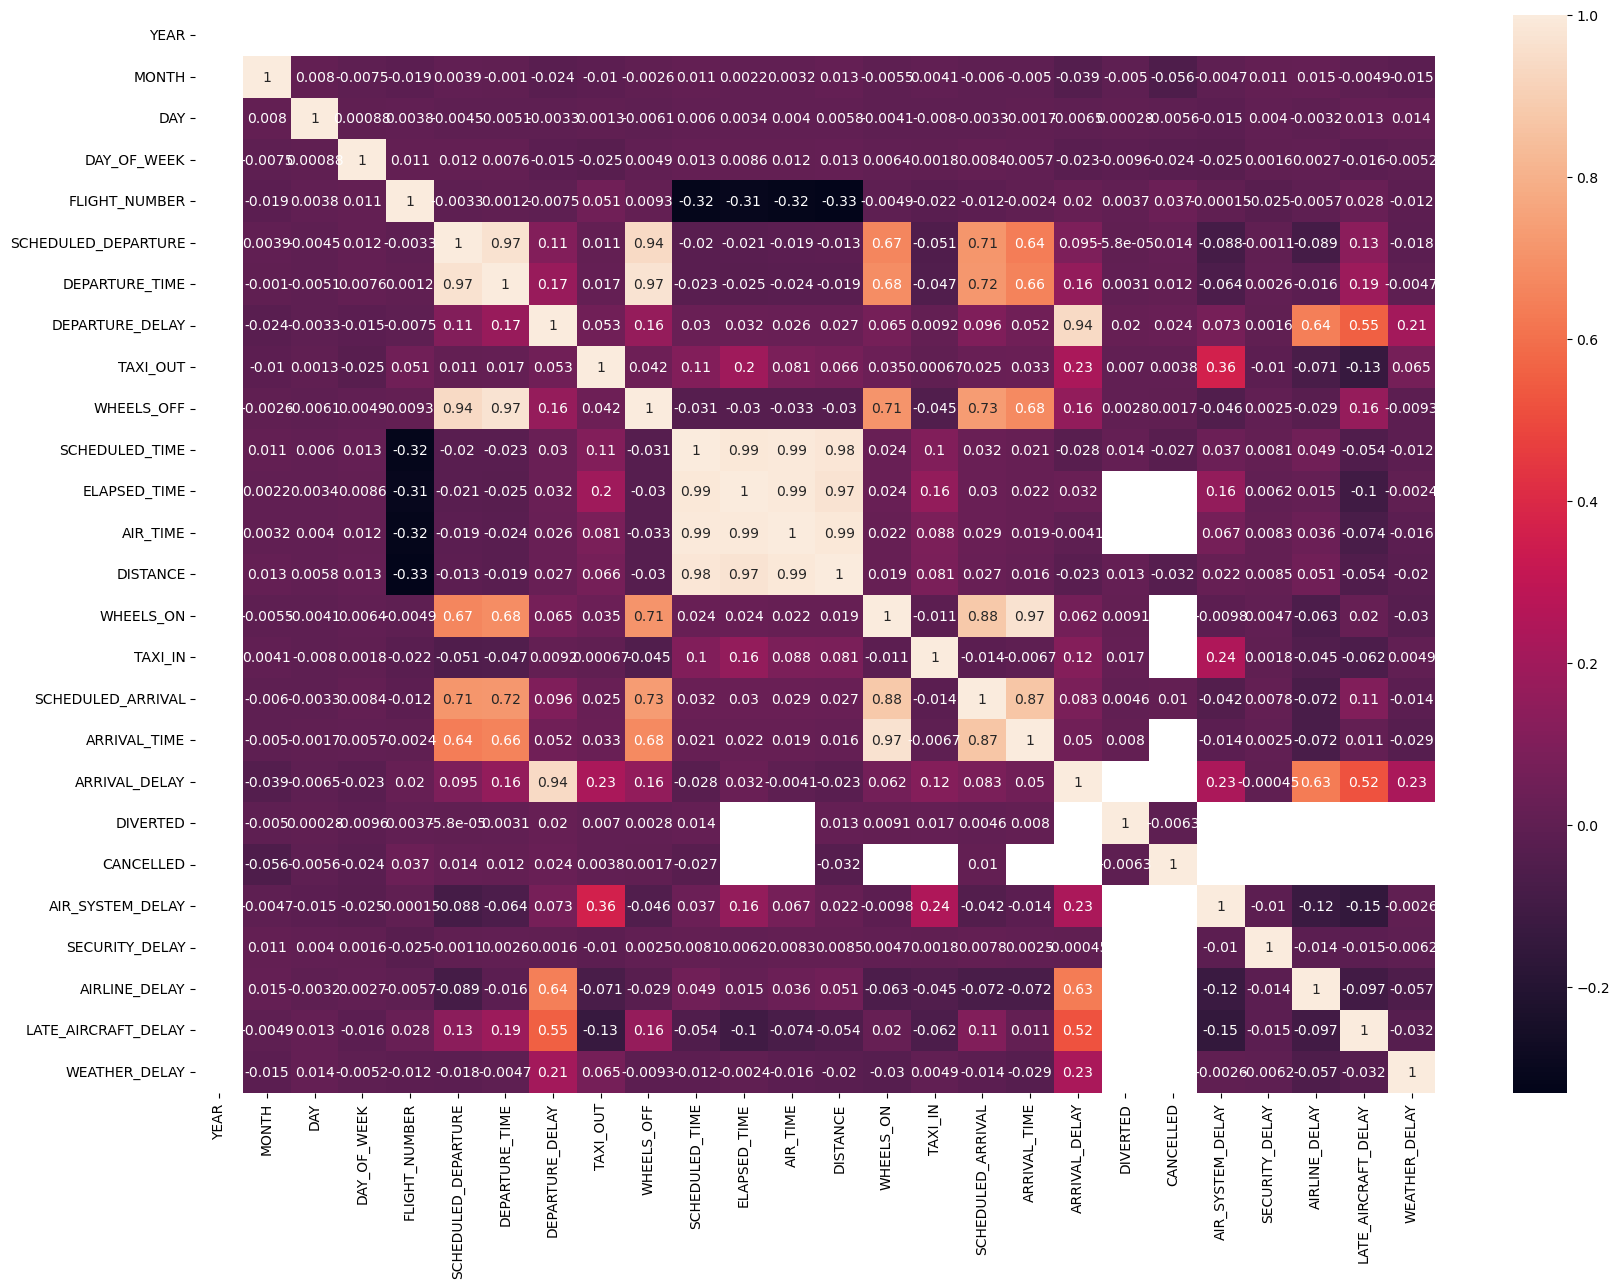

In [12]:

numeric_columns = df_flights.select_dtypes(include=[np.number])

# Create the correlation matrix and display the heatmap.
plt.figure(figsize=(20, 14))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()


In [13]:
numeric_columns
     

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
894888,2015,2,28,6,1159,1529,1527.0,-2.0,12.0,1539.0,...,1750,1734.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN
3251638,2015,7,22,3,644,1655,1653.0,-2.0,11.0,1704.0,...,1804,1758.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN
208949,2015,1,14,3,5730,1427,1419.0,-8.0,36.0,1455.0,...,1605,1616.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN
1048268,2015,3,10,2,4770,958,956.0,-2.0,15.0,1011.0,...,1050,1041.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN
5319238,2015,11,29,7,206,1850,1855.0,5.0,9.0,1904.0,...,1955,2014.0,19.0,0,0,19.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153081,2015,3,16,1,3145,1655,1647.0,-8.0,7.0,1654.0,...,1905,1836.0,-29.0,0,0,NaN,NaN,NaN,NaN,NaN
3122133,2015,7,15,3,107,613,605.0,-8.0,7.0,612.0,...,655,643.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN
1612407,2015,4,13,1,761,2130,2129.0,-1.0,14.0,2143.0,...,2219,2224.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN
5559951,2015,12,15,2,4364,1035,1026.0,-9.0,20.0,1046.0,...,1240,1221.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN


In [14]:

variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
df_flights.drop(variables_to_remove,axis=1,inplace= True)
df_flights.columns
     

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [15]:

airport = pd.read_csv('airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [16]:

df_flights.loc[~df_flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
df_flights.loc[~df_flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
df_flights
     

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
894888,2,28,6,DL,BUF,ATL,1529,-2.0,712,-16.0
3251638,7,22,3,AA,PHX,ONT,1655,-2.0,325,-6.0
208949,1,14,3,EV,PVD,IAD,1427,-8.0,372,11.0
1048268,3,10,2,OO,MSP,DIK,958,-2.0,481,-9.0
5319238,11,29,7,WN,LBB,AUS,1850,5.0,341,19.0
...,...,...,...,...,...,...,...,...,...,...
1153081,3,16,1,WN,CMH,MCO,1655,-8.0,802,-29.0
3122133,7,15,3,HA,KOA,HNL,613,-8.0,163,-12.0
1612407,4,13,1,F9,DEN,LAS,2130,-1.0,628,5.0
5559951,12,15,2,EV,EWR,GSP,1035,-9.0,594,-19.0


In [17]:

print(df_flights.ORIGIN_AIRPORT.nunique())
print(df_flights.DESTINATION_AIRPORT.nunique())
print(df_flights.AIRLINE.nunique())

322
318
14


In [18]:
df_flights=df_flights.dropna()
df_flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
894888,2,28,6,DL,BUF,ATL,1529,-2.0,712,-16.0
3251638,7,22,3,AA,PHX,ONT,1655,-2.0,325,-6.0
208949,1,14,3,EV,PVD,IAD,1427,-8.0,372,11.0
1048268,3,10,2,OO,MSP,DIK,958,-2.0,481,-9.0
5319238,11,29,7,WN,LBB,AUS,1850,5.0,341,19.0
...,...,...,...,...,...,...,...,...,...,...
1153081,3,16,1,WN,CMH,MCO,1655,-8.0,802,-29.0
3122133,7,15,3,HA,KOA,HNL,613,-8.0,163,-12.0
1612407,4,13,1,F9,DEN,LAS,2130,-1.0,628,5.0
5559951,12,15,2,EV,EWR,GSP,1035,-9.0,594,-19.0


In [19]:

df_flights.shape

(98200, 10)

In [20]:
df=pd.DataFrame(df_flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
df_flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
894888,2,28,6,DL,BUF,ATL,1529,-2.0,712,-16.0
3251638,7,22,3,AA,PHX,ONT,1655,-2.0,325,-6.0
208949,1,14,3,EV,PVD,IAD,1427,-8.0,372,11.0
1048268,3,10,2,OO,MSP,DIK,958,-2.0,481,-9.0
5319238,11,29,7,WN,LBB,AUS,1850,5.0,341,19.0
...,...,...,...,...,...,...,...,...,...,...
1153081,3,16,1,WN,CMH,MCO,1655,-8.0,802,-29.0
3122133,7,15,3,HA,KOA,HNL,613,-8.0,163,-12.0
1612407,4,13,1,F9,DEN,LAS,2130,-1.0,628,5.0
5559951,12,15,2,EV,EWR,GSP,1035,-9.0,594,-19.0


In [21]:

dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
894888,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3251638,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
208949,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1048268,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
5319238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153081,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3122133,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1612407,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5559951,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [22]:

df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=657)

In [23]:
df.columns


Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [24]:

df_flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [25]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df
     

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
894888,2,28,1529,-2.0,712,-16.0
3251638,7,22,1655,-2.0,325,-6.0
208949,1,14,1427,-8.0,372,11.0
1048268,3,10,958,-2.0,481,-9.0
5319238,11,29,1850,5.0,341,19.0
...,...,...,...,...,...,...
1153081,3,16,1655,-8.0,802,-29.0
3122133,7,15,613,-8.0,163,-12.0
1612407,4,13,2130,-1.0,628,5.0
5559951,12,15,1035,-9.0,594,-19.0


In [26]:
data=pd.concat([df,df_cat],axis=1)
data


,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
894888,2,28,1529,-2.0,712,-16.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3251638,7,22,1655,-2.0,325,-6.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
208949,1,14,1427,-8.0,372,11.0,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1048268,3,10,958,-2.0,481,-9.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5319238,11,29,1850,5.0,341,19.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153081,3,16,1655,-8.0,802,-29.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3122133,7,15,613,-8.0,163,-12.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1612407,4,13,2130,-1.0,628,5.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5559951,12,15,1035,-9.0,594,-19.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [27]:
data.shape

(98200, 663)

In [28]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
512659,2,3,1912,9.0,191,13.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1167701,3,17,1452,116.0,515,97.0,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1033423,3,9,1145,-3.0,814,-12.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1580884,4,12,600,2.0,1197,-5.0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4063263,9,10,1000,-1.0,775,-7.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434671,6,3,2025,-6.0,109,-5.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
786195,2,21,1618,-1.0,679,-2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3070475,7,12,610,-6.0,2586,-42.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5050566,11,12,850,4.0,1259,-7.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [29]:
final_data.shape

(60000, 663)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [32]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
512659,2,3,1912,191,13.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1167701,3,17,1452,515,97.0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1033423,3,9,1145,814,-12.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1580884,4,12,600,1197,-5.0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4063263,9,10,1000,775,-7.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434671,6,3,2025,109,-5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
786195,2,21,1618,679,-2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3070475,7,12,610,2586,-42.0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
5050566,11,12,850,1259,-7.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [33]:
Y

512659       9.0
1167701    116.0
1033423     -3.0
1580884      2.0
4063263     -1.0
           ...  
2434671     -6.0
786195      -1.0
3070475     -6.0
5050566      4.0
2675742      0.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
for column in X_train.columns:
    if pd.api.types.is_datetime64_any_dtype(X_train[column]):
        print(f"Column '{column}' is of datetime type.")

In [37]:
y_pred = reg_rf.predict(X_test)

In [38]:
reg_rf.score(X_train,y_train)

0.9885729548112816

In [39]:
reg_rf.score(X_test,y_test)

0.9225946742276047

In [40]:
metrics.r2_score(y_test,y_pred)

0.9225946742276047

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.071823333333334
MSE: 102.77744686666666
RMSE: 10.13792123004843


In [42]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
1662037,-1.0,-4.44
2733038,52.0,69.51
1126235,-5.0,-8.24
1842032,-6.0,2.02
1919038,-3.0,-5.16
...,...,...
2788622,-17.0,-5.21
343705,20.0,13.62
230865,-2.0,-3.04
3621329,-7.0,-3.59


In [43]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [46]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  13.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  13.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

C:\Users\91636\anaconda3\conda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91636\anaconda3\conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91636\anaconda3\conda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\91636\anaconda3\conda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91636\anac

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 165,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [48]:
p=rf_random.predict(X_test)

In [49]:
metrics.r2_score(y_test,p)

0.6028763018869707

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 11.562524627738155
MSE: 527.2939474774719
RMSE: 22.96288195060611


In [51]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
1662037,-1.0,4.096647
2733038,52.0,31.980214
1126235,-5.0,1.540339
1842032,-6.0,2.541463
1919038,-3.0,1.157971
...,...,...
2788622,-17.0,5.556291
343705,20.0,3.634554
230865,-2.0,6.516521
3621329,-7.0,5.484703


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [53]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.078041022164975
MSE: 98.29920860688341
RMSE: 9.914595735928087


In [55]:
metrics.r2_score(y_test,pre)

0.9259673936514936

In [56]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
1662037,-1.0,-3.413126
2733038,52.0,63.903943
1126235,-5.0,-7.942157
1842032,-6.0,-0.087879
1919038,-3.0,-4.934627
...,...,...
2788622,-17.0,-4.219070
343705,20.0,9.995018
230865,-2.0,-1.506476
3621329,-7.0,-1.755854


In [57]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [58]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

C:\Users\91636\anaconda3\conda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-3.8574997275979084

In [59]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
